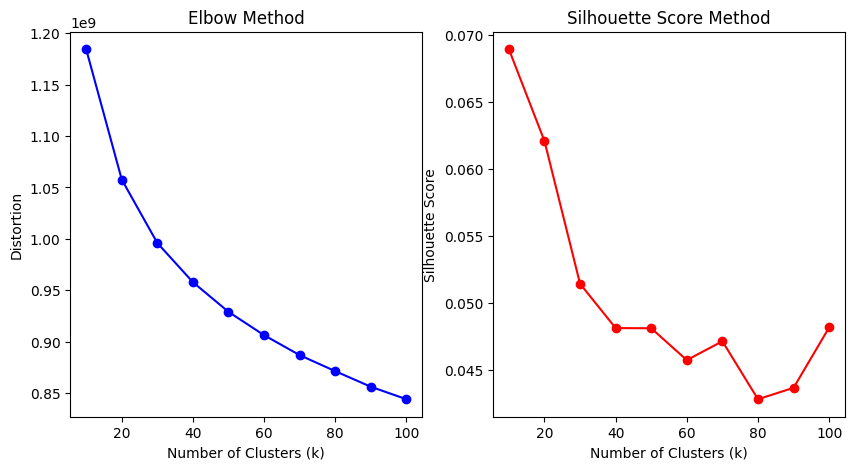

Optimal k value determined: 10
Data saved to SIFT_DM_LR_CSV.csv


In [ ]:
import cv2
import numpy as np
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def preprocess_image(image):
    """
    Preprocess the thermogram image.
    Applies Min-Max Normalization, Contrast Enhancement, and CLAHE.
    """
    def min_max_normalization(data):
        min_val, max_val = np.min(data), np.max(data)
        return (((data - min_val) / (max_val - min_val)) * 255).astype(np.uint8)

    def contrast_enhancement(image, alpha=1.5, beta=0):
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    def apply_clahe(image):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

    return apply_clahe(contrast_enhancement(min_max_normalization(image)))

def extract_sift_features(image):
    """Detects SIFT keypoints and computes descriptors for the input image."""
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        raise ValueError("No descriptors found in the image.")
    return keypoints, descriptors

def find_optimal_k(descriptors_list, min_k=10, max_k=100, step=10):
    """
    Determines the optimal k value using the Elbow Method and Silhouette Score.
    """
    all_descriptors = np.vstack(descriptors_list)
    distortions, silhouette_scores = [], []
    k_values = list(range(min_k, max_k + 1, step))

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(all_descriptors)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(all_descriptors, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

    return k_values[np.argmax(silhouette_scores)]

def bag_of_features(descriptors_list, k):
    """
    Performs k-means clustering on descriptors to create a BoF model.
    """
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_descriptors)
    histograms = []
    for descriptors in descriptors_list:
        labels = kmeans.predict(descriptors)
        histogram, _ = np.histogram(labels, bins=np.arange(k + 1), density=True)
        histograms.append(histogram)
    return kmeans, histograms

def process_zip_file(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10):
    """
    Process images from a ZIP file and save BoF histograms to a CSV file.
    """
    if not os.path.exists(zip_file_path):
        raise FileNotFoundError(f"The file '{zip_file_path}' does not exist.")

    image_names, keypoints_counts, descriptors_list = [], [], []
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            for filename in zip_ref.namelist():
                if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    with zip_ref.open(filename) as image_file:
                        image_data = np.frombuffer(image_file.read(), np.uint8)
                        image = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE)

                    if image is not None:
                        try:
                            preprocessed_image = preprocess_image(image)
                            keypoints, descriptors = extract_sift_features(preprocessed_image)
                            image_names.append(filename)
                            keypoints_counts.append(len(keypoints))
                            descriptors_list.append(descriptors)
                        except ValueError:
                            print(f"Skipping {filename}: No descriptors found.")
    except zipfile.BadZipFile:
        print(f"Error: The file '{zip_file_path}' is not a valid ZIP file or is corrupted.")

    if descriptors_list:
        optimal_k = find_optimal_k(descriptors_list, min_k, max_k, step)
        print(f"Optimal k value determined: {optimal_k}")
        _, histograms = bag_of_features(descriptors_list, optimal_k)

        data = {'Image Name': image_names, 'Number of Keypoints': keypoints_counts}
        for i in range(optimal_k):
            data[f'BOF Feature {i+1}'] = [hist[i] for hist in histograms]

        df = pd.DataFrame(data)
        df.to_csv(output_csv_path, index=False)
        print(f"Data saved to {output_csv_path}")
    else:
        print("No valid descriptors found in any image.")

if __name__ == "__main__":
    zip_file_path = "/content/DM Group LR.zip"  # Replace with your ZIP file path
    output_csv_path = "SIFT_DM_LR_CSV.csv"

    try:
        process_zip_file(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10)
    except Exception as e:
        print(str(e))


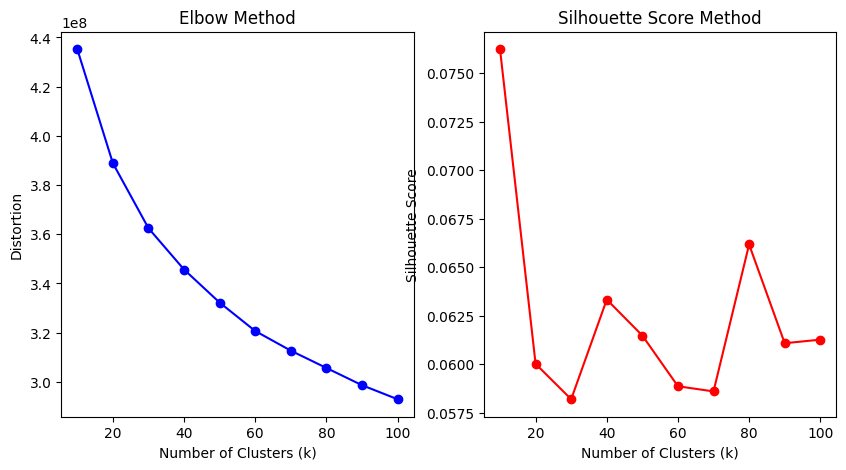

Optimal k value determined: 10
Data saved to SIFT_CG_ LF_CSV.csv


In [ ]:
import cv2
import numpy as np
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def preprocess_image(image):
    """
    Preprocess the thermogram image.
    Applies Min-Max Normalization, Contrast Enhancement, and CLAHE.
    """
    def min_max_normalization(data):
        min_val, max_val = np.min(data), np.max(data)
        return (((data - min_val) / (max_val - min_val)) * 255).astype(np.uint8)

    def contrast_enhancement(image, alpha=1.5, beta=0):
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    def apply_clahe(image):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

    return apply_clahe(contrast_enhancement(min_max_normalization(image)))

def extract_sift_features(image):
    """Detects SIFT keypoints and computes descriptors for the input image."""
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        raise ValueError("No descriptors found in the image.")
    return keypoints, descriptors

def find_optimal_k(descriptors_list, min_k=10, max_k=100, step=10):
    """
    Determines the optimal k value using the Elbow Method and Silhouette Score.
    """
    all_descriptors = np.vstack(descriptors_list)
    distortions, silhouette_scores = [], []
    k_values = list(range(min_k, max_k + 1, step))

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(all_descriptors)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(all_descriptors, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

    return k_values[np.argmax(silhouette_scores)]

def bag_of_features(descriptors_list, k):
    """
    Performs k-means clustering on descriptors to create a BoF model.
    """
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_descriptors)
    histograms = []
    for descriptors in descriptors_list:
        labels = kmeans.predict(descriptors)
        histogram, _ = np.histogram(labels, bins=np.arange(k + 1), density=True)
        histograms.append(histogram)
    return kmeans, histograms

def process_zip_file(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10):
    """
    Process images from a ZIP file and save BoF histograms to a CSV file.
    """
    if not os.path.exists(zip_file_path):
        raise FileNotFoundError(f"The file '{zip_file_path}' does not exist.")

    image_names, keypoints_counts, descriptors_list = [], [], []
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            for filename in zip_ref.namelist():
                if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    with zip_ref.open(filename) as image_file:
                        image_data = np.frombuffer(image_file.read(), np.uint8)
                        image = cv2.imdecode(image_data, cv2.IMREAD_GRAYSCALE)

                    if image is not None:
                        try:
                            preprocessed_image = preprocess_image(image)
                            keypoints, descriptors = extract_sift_features(preprocessed_image)
                            image_names.append(filename)
                            keypoints_counts.append(len(keypoints))
                            descriptors_list.append(descriptors)
                        except ValueError:
                            print(f"Skipping {filename}: No descriptors found.")
    except zipfile.BadZipFile:
        print(f"Error: The file '{zip_file_path}' is not a valid ZIP file or is corrupted.")

    if descriptors_list:
        optimal_k = find_optimal_k(descriptors_list, min_k, max_k, step)
        print(f"Optimal k value determined: {optimal_k}")
        _, histograms = bag_of_features(descriptors_list, optimal_k)

        data = {'Image Name': image_names, 'Number of Keypoints': keypoints_counts}
        for i in range(optimal_k):
            data[f'BOF Feature {i+1}'] = [hist[i] for hist in histograms]

        df = pd.DataFrame(data)
        df.to_csv(output_csv_path, index=False)
        print(f"Data saved to {output_csv_path}")
    else:
        print("No valid descriptors found in any image.")

if __name__ == "__main__":
    zip_file_path = "/content/Control Group LR.zip"  # Replace with your ZIP file path
    output_csv_path = "SIFT_CG_ LF_CSV.csv"

    try:
        process_zip_file(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10)
    except Exception as e:
        print(str(e))

SMOTE

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def balance_dataset(file1, file2, output_file):
    """
    Balances the smaller dataset using SMOTE to match the larger dataset.

    Args:
        file1 (str): Path to the CSV file with 450 samples.
        file2 (str): Path to the CSV file with 1220 samples.
        output_file (str): Path to save the balanced dataset.
    """
    # Load both datasets using pd.read_csv
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Concatenate both datasets for SMOTE processing
    df1['label'] = 0  # Assign label 0 for file1
    df2['label'] = 1  # Assign label 1 for file2

    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Separate features and labels
    X = combined_df.iloc[:, 1:-1].values  # All descriptor columns (exclude filename and label)
    y = combined_df['label'].values      # Label column

    # Apply SMOTE to balance the data
    #The sampling_strategy parameter is modified to oversample the minority class (label 0)
    #to match the number of samples in the majority class (label 1).
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Create a new DataFrame for the balanced dataset
    balanced_df = pd.DataFrame(X_resampled, columns=combined_df.columns[1:-1])
    balanced_df['label'] = y_resampled

    # Save the balanced dataset to an Excel file
    balanced_df.to_excel(output_file, index=False)
    print(f"Balanced dataset saved as {output_file}")

# Example usage
file1_path = '/content/SIFT_CG_ LF_CSV.csv'   # File with 450 samples
file2_path = '/content/SIFT_DM_LR_CSV.csv' # File with 1220 samples
output_path = '/content/balanced_dataset_FULL_FOOT_SIFT.xlsx'             # Output file path

balance_dataset(file1_path, file2_path, output_path)

Balanced dataset saved as /content/balanced_dataset_FULL_FOOT_SIFT.xlsx


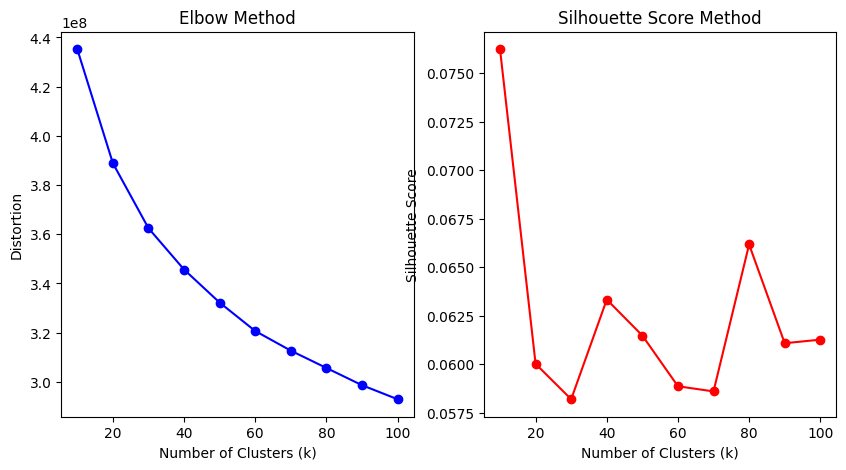

Optimal k value determined: 10
Data saved to SIFT_DM_LR_CSV_2.csv


In [ ]:
import cv2
import numpy as np
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def generate_thermal_image(temperature_data):
    """
    Converts temperature data into a grayscale image.
    Applies Min-Max Normalization and Contrast Enhancement.
    """
    min_val, max_val = np.min(temperature_data), np.max(temperature_data)
    norm_image = ((temperature_data - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    # Apply contrast enhancement
    enhanced_image = cv2.convertScaleAbs(norm_image, alpha=1.5, beta=0)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    processed_image = clahe.apply(enhanced_image)

'''def preprocess_image(image):
    """
    Preprocess the thermogram image.
    Applies Min-Max Normalization, Contrast Enhancement, and CLAHE.
    """
    def min_max_normalization(data):
        min_val, max_val = np.min(data), np.max(data)
        return (((data - min_val) / (max_val - min_val)) * 255).astype(np.uint8)

    def contrast_enhancement(image, alpha=1.5, beta=0):
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    def apply_clahe(image):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

    return apply_clahe(contrast_enhancement(min_max_normalization(image)))'''

def extract_sift_features(image):
    """Detects SIFT keypoints and computes descriptors for the input image."""
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        raise ValueError("No descriptors found in the image.")
    return keypoints, descriptors

def find_optimal_k(descriptors_list, min_k=10, max_k=100, step=10):
    """
    Determines the optimal k value using the Elbow Method and Silhouette Score.
    """
    all_descriptors = np.vstack(descriptors_list)
    distortions, silhouette_scores = [], []
    k_values = list(range(min_k, max_k + 1, step))

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(all_descriptors)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(all_descriptors, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

    return k_values[np.argmax(silhouette_scores)]

def bag_of_features(descriptors_list, k):
    """
    Performs k-means clustering on descriptors to create a BoF model.
    """
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_descriptors)
    histograms = []
    for descriptors in descriptors_list:
        labels = kmeans.predict(descriptors)
        histogram, _ = np.histogram(labels, bins=np.arange(k + 1), density=True)
        histograms.append(histogram)
    return kmeans, histograms

def process_temperature_zip(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10):
    """Processes temperature data from CSV files inside a ZIP, extracts BoF features, and saves to CSV."""
    if not os.path.exists(zip_file_path):
        raise FileNotFoundError(f"The file '{zip_file_path}' does not exist.")

    image_names, keypoints_counts, descriptors_list, labels = [], [], [], []

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            file_list = zip_ref.namelist()
            print("Files in ZIP:", file_list)  # Debug: List all files in the ZIP

            for filename in file_list:
                if filename.endswith('.csv') and not filename.startswith('__MACOSX'):
                    with zip_ref.open(filename) as temp_file:
                        try:
                            # Read temperature values from CSV
                            temperature_data = np.loadtxt(temp_file, delimiter=',', skiprows=1)

                            # Skip empty CSV files
                            if temperature_data.size == 0:
                                print(f"Skipping {filename}: Empty CSV file.")
                                continue

                            print(f"Processing {filename}: Data shape {temperature_data.shape}")  # Debug print

                        except Exception as e:
                            print(f"Skipping {filename}: Error reading CSV - {e}")
                            continue

                    # Generate thermal image
                    image = generate_thermal_image(temperature_data)

                    # Save generated images for debugging (Optional)
                    cv2.imwrite(f"debug_{filename}.png", image)

                    # Extract SIFT features
                    keypoints, descriptors = extract_sift_features(image)

                    if descriptors is not None:
                        image_names.append(filename)
                        keypoints_counts.append(len(keypoints))
                        descriptors_list.append(descriptors)
                        labels.append(0 if filename.lower().startswith("cg") else 1)
                    else:
                        print(f"Skipping {filename}: No descriptors found.")

    except zipfile.BadZipFile:
        print(f"Error: The file '{zip_file_path}' is not a valid ZIP file or is corrupted.")

    if descriptors_list:
        optimal_k = find_optimal_k(descriptors_list, min_k, max_k, step)
        print(f"Optimal k value determined: {optimal_k}")
        _, histograms = bag_of_features(descriptors_list, optimal_k)

        data = {'Image Name': image_names, 'Number of Keypoints': keypoints_counts}
        for i in range(optimal_k):
            data[f'BOF Feature {i+1}'] = [hist[i] for hist in histograms]

        df = pd.DataFrame(data)
        df.to_csv(output_csv_path, index=False)
        print(f"Data saved to {output_csv_path}")
    else:
        print("No valid descriptors found in any image.")

if __name__ == "__main__":
    zip_file_path = "/content/Control Group LR.zip"  # Replace with your ZIP file path
    output_csv_path = "SIFT_DM_LR_CSV_2.csv"

    try:
        process_zip_file(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10)
    except Exception as e:
        print(str(e))


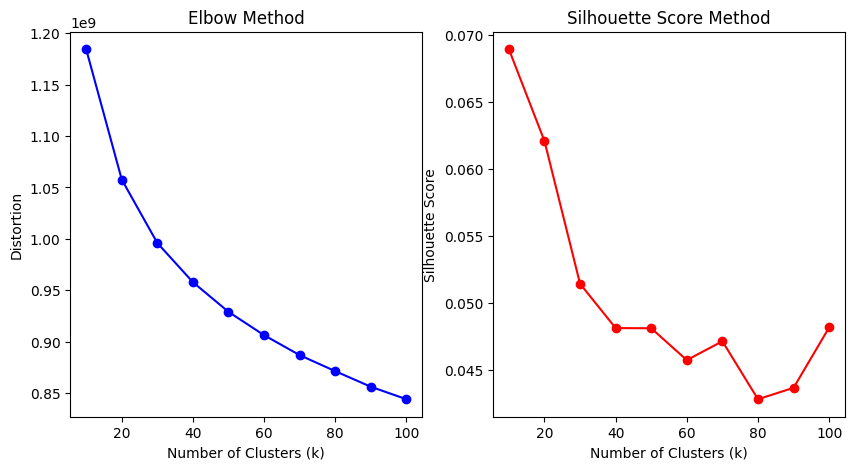

Optimal k value determined: 10
Data saved to SIFT_CG_ LF_CSV_2.csv


In [ ]:
import cv2
import numpy as np
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def generate_thermal_image(temperature_data):
    """
    Converts temperature data into a grayscale image.
    Applies Min-Max Normalization and Contrast Enhancement.
    """
    min_val, max_val = np.min(temperature_data), np.max(temperature_data)
    norm_image = ((temperature_data - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    # Apply contrast enhancement
    enhanced_image = cv2.convertScaleAbs(norm_image, alpha=1.5, beta=0)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    processed_image = clahe.apply(enhanced_image)

'''def preprocess_image(image):
    """
    Preprocess the thermogram image.
    Applies Min-Max Normalization, Contrast Enhancement, and CLAHE.
    """
    def min_max_normalization(data):
        min_val, max_val = np.min(data), np.max(data)
        return (((data - min_val) / (max_val - min_val)) * 255).astype(np.uint8)

    def contrast_enhancement(image, alpha=1.5, beta=0):
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    def apply_clahe(image):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

    return apply_clahe(contrast_enhancement(min_max_normalization(image)))'''

def extract_sift_features(image):
    """Detects SIFT keypoints and computes descriptors for the input image."""
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        raise ValueError("No descriptors found in the image.")
    return keypoints, descriptors

def find_optimal_k(descriptors_list, min_k=10, max_k=100, step=10):
    """
    Determines the optimal k value using the Elbow Method and Silhouette Score.
    """
    all_descriptors = np.vstack(descriptors_list)
    distortions, silhouette_scores = [], []
    k_values = list(range(min_k, max_k + 1, step))

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(all_descriptors)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(all_descriptors, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    plt.show()

    return k_values[np.argmax(silhouette_scores)]

def bag_of_features(descriptors_list, k):
    """
    Performs k-means clustering on descriptors to create a BoF model.
    """
    all_descriptors = np.vstack(descriptors_list)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_descriptors)
    histograms = []
    for descriptors in descriptors_list:
        labels = kmeans.predict(descriptors)
        histogram, _ = np.histogram(labels, bins=np.arange(k + 1), density=True)
        histograms.append(histogram)
    return kmeans, histograms

def process_temperature_zip(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10):
    """Processes temperature data from CSV files inside a ZIP, extracts BoF features, and saves to CSV."""
    if not os.path.exists(zip_file_path):
        raise FileNotFoundError(f"The file '{zip_file_path}' does not exist.")

    image_names, keypoints_counts, descriptors_list, labels = [], [], [], []

    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            file_list = zip_ref.namelist()
            print("Files in ZIP:", file_list)  # Debug: List all files in the ZIP

            for filename in file_list:
                if filename.endswith('.csv') and not filename.startswith('__MACOSX'):
                    with zip_ref.open(filename) as temp_file:
                        try:
                            # Read temperature values from CSV
                            temperature_data = np.loadtxt(temp_file, delimiter=',', skiprows=1)

                            # Skip empty CSV files
                            if temperature_data.size == 0:
                                print(f"Skipping {filename}: Empty CSV file.")
                                continue

                            print(f"Processing {filename}: Data shape {temperature_data.shape}")  # Debug print

                        except Exception as e:
                            print(f"Skipping {filename}: Error reading CSV - {e}")
                            continue

                    # Generate thermal image
                    image = generate_thermal_image(temperature_data)

                    # Save generated images for debugging (Optional)
                    cv2.imwrite(f"debug_{filename}.png", image)

                    # Extract SIFT features
                    keypoints, descriptors = extract_sift_features(image)

                    if descriptors is not None:
                        image_names.append(filename)
                        keypoints_counts.append(len(keypoints))
                        descriptors_list.append(descriptors)
                        labels.append(0 if filename.lower().startswith("cg") else 1)
                    else:
                        print(f"Skipping {filename}: No descriptors found.")

    except zipfile.BadZipFile:
        print(f"Error: The file '{zip_file_path}' is not a valid ZIP file or is corrupted.")

    if descriptors_list:
        optimal_k = find_optimal_k(descriptors_list, min_k, max_k, step)
        print(f"Optimal k value determined: {optimal_k}")
        _, histograms = bag_of_features(descriptors_list, optimal_k)

        data = {'Image Name': image_names, 'Number of Keypoints': keypoints_counts}
        for i in range(optimal_k):
            data[f'BOF Feature {i+1}'] = [hist[i] for hist in histograms]

        df = pd.DataFrame(data)
        df.to_csv(output_csv_path, index=False)
        print(f"Data saved to {output_csv_path}")
    else:
        print("No valid descriptors found in any image.")

if __name__ == "__main__":
    zip_file_path = "/content/DM Group LR.zip"  # Replace with your ZIP file path
    output_csv_path = "SIFT_CG_ LF_CSV_2.csv"

    try:
        process_zip_file(zip_file_path, output_csv_path, min_k=10, max_k=100, step=10)
    except Exception as e:
        print(str(e))

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def balance_dataset(file1, file2, output_file):
    """
    Balances the smaller dataset using SMOTE to match the larger dataset.

    Args:
        file1 (str): Path to the CSV file with 450 samples.
        file2 (str): Path to the CSV file with 1220 samples.
        output_file (str): Path to save the balanced dataset.
    """
    # Load both datasets using pd.read_csv
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Concatenate both datasets for SMOTE processing
    df1['label'] = 0  # Assign label 0 for file1
    df2['label'] = 1  # Assign label 1 for file2

    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Separate features and labels
    X = combined_df.iloc[:, 1:-1].values  # All descriptor columns (exclude filename and label)
    y = combined_df['label'].values      # Label column

    # Apply SMOTE to balance the data
    #The sampling_strategy parameter is modified to oversample the minority class (label 0)
    #to match the number of samples in the majority class (label 1).
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Create a new DataFrame for the balanced dataset
    balanced_df = pd.DataFrame(X_resampled, columns=combined_df.columns[1:-1])
    balanced_df['label'] = y_resampled

    # Save the balanced dataset to an Excel file
    balanced_df.to_excel(output_file, index=False)
    print(f"Balanced dataset saved as {output_file}")

# Example usage
file1_path = '/content/SIFT_CG_ LF_CSV_2.csv'   # File with 450 samples
file2_path = '/content/SIFT_DM_LR_CSV_2.csv' # File with 1220 samples
output_path = '/content/balanced_dataset_FULL_FOOT_SIFT_2.xlsx'             # Output file path

balance_dataset(file1_path, file2_path, output_path)

Balanced dataset saved as /content/balanced_dataset_FULL_FOOT_SIFT_2.xlsx
